<a href="https://colab.research.google.com/github/abubakar1109/Learning-AI-ML/blob/main/Day3_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Logistic Regression

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
no_of_hrs=[0.5,0.75,1,1.25,1.5,1.75,1.75,2,2.25,2.5,2.75,3,3.25,3.5,4,4.25,4.5,4.75,5,5.5]

pass_or_not=[0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1]

In [4]:
hrs=pd.Series(no_of_hrs)
pf=pd.Series(pass_or_not)

In [6]:
data=pd.concat([hrs,pf],axis=1)


In [7]:
data

,0,1
0,0.50,0
1,0.75,0
2,1.00,0
3,1.25,0
4,1.50,0
5,1.75,0
6,1.75,1
7,2.00,0
8,2.25,1
9,2.50,0


In [8]:
df=pd.DataFrame(data)

In [9]:
df.rename(columns={0:'hrs',1:'p/f'}, inplace=True)

In [10]:
df

,hrs,p/f
0,0.50,0
1,0.75,0
2,1.00,0
3,1.25,0
4,1.50,0
5,1.75,0
6,1.75,1
7,2.00,0
8,2.25,1
9,2.50,0


<Axes: xlabel='hrs', ylabel='p/f'>

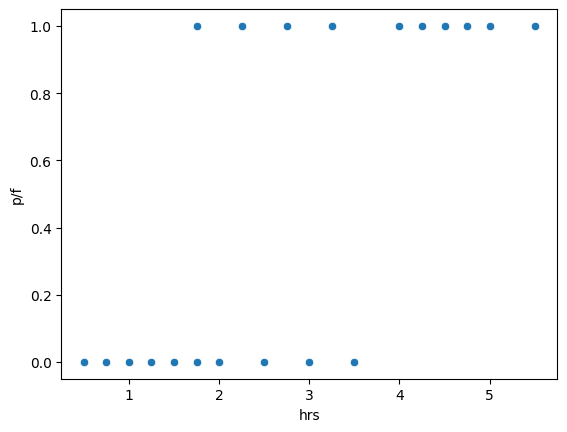

In [11]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='hrs',y='p/f',data=df)

Lab Session 1

In [1]:
import kagglehub
path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")

Using Colab cache for faster access to the 'pima-indians-diabetes-database' dataset.


In [9]:
df=pd.read_csv("/kaggle/input/pima-indians-diabetes-database/diabetes.csv")

In [10]:
df.shape

(768, 9)

In [11]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
df.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [14]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [15]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

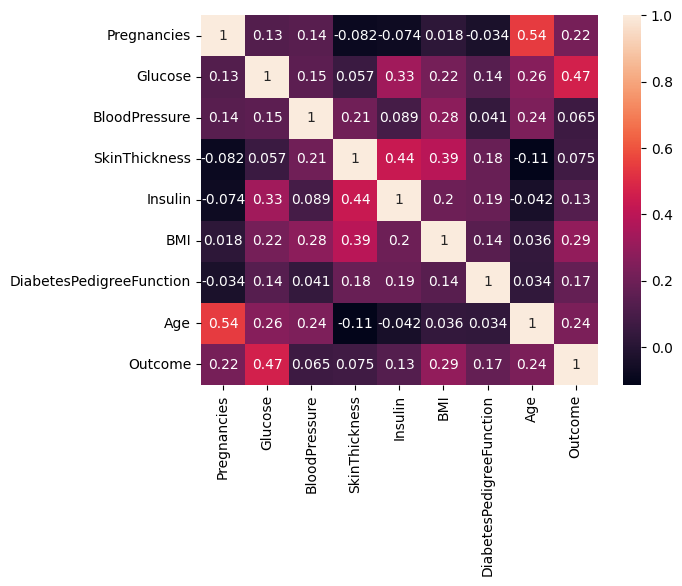

In [26]:
sns.heatmap(df.corr(), annot=True)

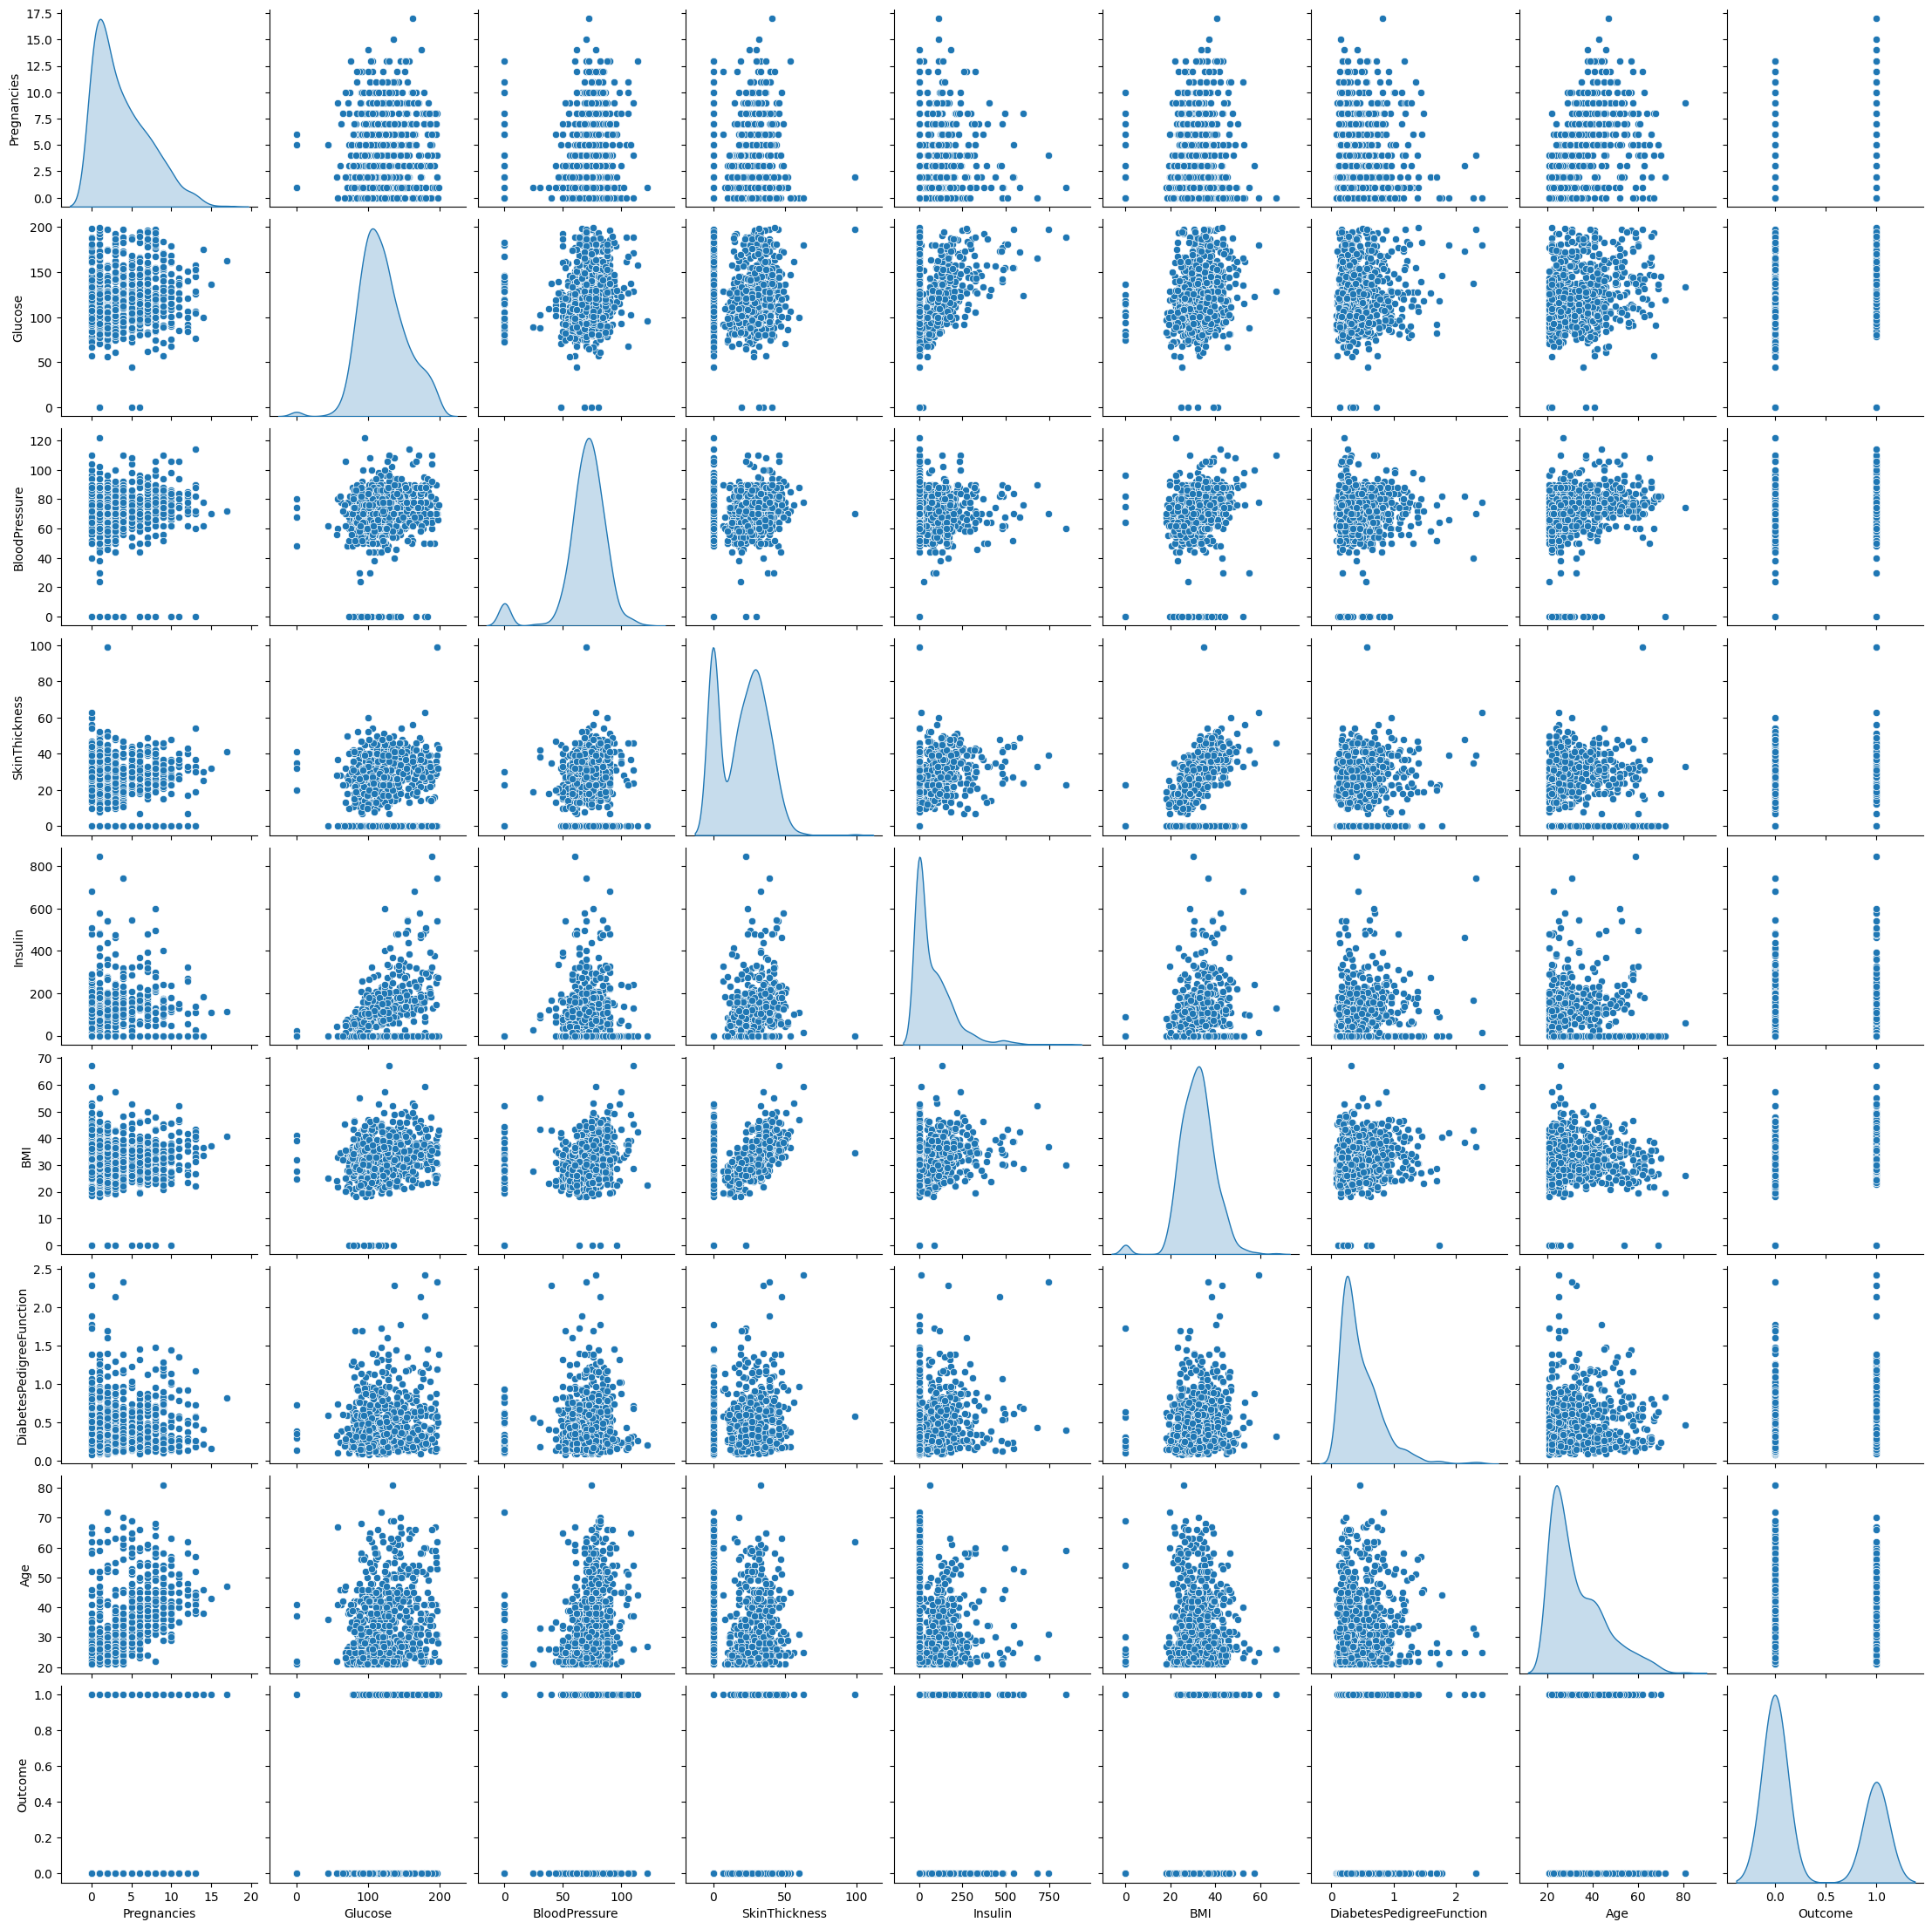

In [27]:
sns.pairplot(df,diag_kind='kde')

In [17]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


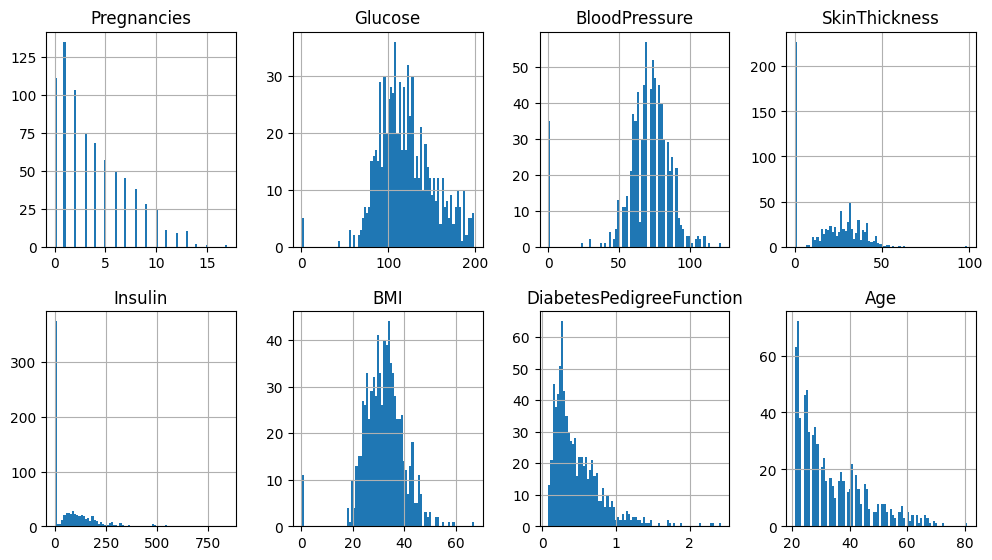

In [20]:
columns = list(df)[0:-1]
myPlot=df[columns].hist(bins=80,figsize=(12,50),layout=(14,4))

In [34]:
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


Splitting Data

In [35]:
from sklearn.model_selection import train_test_split

Y=df['Outcome']
X=df.drop('Outcome', axis=1)

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [36]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
88,15,136,70,32,110,37.1,0.153,43
467,0,97,64,36,100,36.8,0.600,25
550,1,116,70,28,0,27.4,0.204,21
147,2,106,64,35,119,30.5,1.400,34
481,0,123,88,37,0,35.2,0.197,29
...,...,...,...,...,...,...,...,...
645,2,157,74,35,440,39.4,0.134,30
715,7,187,50,33,392,33.9,0.826,34
72,13,126,90,0,0,43.4,0.583,42
235,4,171,72,0,0,43.6,0.479,26


In [37]:
Y_train

,Outcome
88,1
467,0
550,0
147,0
481,0
...,...
645,0
715,1
72,1
235,1


Data Prepration

In [38]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
88,15,136,70,32,110,37.1,0.153,43
467,0,97,64,36,100,36.8,0.600,25
550,1,116,70,28,0,27.4,0.204,21
147,2,106,64,35,119,30.5,1.400,34
481,0,123,88,37,0,35.2,0.197,29


Replace 0's with Mean

In [39]:
from sklearn.impute import SimpleImputer
replace = SimpleImputer(missing_values=0, strategy="mean")
cols=X_train.columns
X_train=pd.DataFrame(replace.fit_transform(X_train))
X_test=pd.DataFrame(replace.fit_transform(X_test))

X_train.columns=cols
X_test.columns=cols

In [40]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,15.000000,136.0,70.0,32.0,110.000000,37.1,0.153,43.0
1,4.396514,97.0,64.0,36.0,100.000000,36.8,0.600,25.0
2,1.000000,116.0,70.0,28.0,158.243346,27.4,0.204,21.0
3,2.000000,106.0,64.0,35.0,119.000000,30.5,1.400,34.0
4,4.396514,123.0,88.0,37.0,158.243346,35.2,0.197,29.0


Logistic Regression Model

In [41]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

model=LogisticRegression(solver="liblinear")
model.fit(X_train,Y_train)

LogisticRegression(solver='liblinear')

In [42]:
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7.0,136.0,74.0,26.00,135.000000,26.0,0.647,51.0
1,1.0,151.0,60.0,30.16,150.137405,26.1,0.179,22.0
2,6.0,109.0,60.0,27.00,150.137405,25.0,0.206,27.0
3,3.0,61.0,82.0,28.00,150.137405,34.4,0.243,46.0
4,1.0,116.0,78.0,29.00,180.000000,36.1,0.496,25.0


In [43]:
y_predict=model.predict(X_test)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

In [44]:
model_score= model.score(X_test,Y_test)
print(model_score)

0.7792207792207793


In [50]:
import pandas as pd

y_predict_series = pd.Series(y_predict, name="y_pred")
ndf = pd.concat([X_test.reset_index(drop=True),
                 y_predict_series.reset_index(drop=True)],
                axis=1)

In [51]:
ndf

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,y_pred
0,7.0,136.0,74.0,26.00,135.000000,26.0,0.647,51.0,0
1,1.0,151.0,60.0,30.16,150.137405,26.1,0.179,22.0,0
2,6.0,109.0,60.0,27.00,150.137405,25.0,0.206,27.0,0
3,3.0,61.0,82.0,28.00,150.137405,34.4,0.243,46.0,0
4,1.0,116.0,78.0,29.00,180.000000,36.1,0.496,25.0,0
...,...,...,...,...,...,...,...,...,...
226,4.0,91.0,70.0,32.00,88.000000,33.1,0.446,22.0,0
227,1.0,109.0,38.0,18.00,120.000000,23.1,0.407,26.0,0
228,1.0,91.0,54.0,25.00,100.000000,25.2,0.234,23.0,0
229,10.0,168.0,74.0,30.16,150.137405,38.0,0.537,34.0,1


In [53]:
ndf.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,y_pred
Pregnancies,1.000000,0.176255,0.252386,0.229034,0.035634,0.186920,0.025255,0.550940,0.402992
Glucose,0.176255,1.000000,0.253888,0.197402,0.377841,0.266793,0.178204,0.308113,0.721731
BloodPressure,0.252386,0.253888,1.000000,0.339778,0.051373,0.353605,0.094825,0.298676,0.137990
SkinThickness,0.229034,0.197402,0.339778,1.000000,0.114593,0.630812,0.121581,0.141894,0.262303
Insulin,0.035634,0.377841,0.051373,0.114593,1.000000,0.166843,-0.090517,0.167994,0.330386
BMI,0.186920,0.266793,0.353605,0.630812,0.166843,1.000000,0.174824,0.050297,0.377490
DiabetesPedigreeFunction,0.025255,0.178204,0.094825,0.121581,-0.090517,0.174824,1.000000,0.020748,0.173721
Age,0.550940,0.308113,0.298676,0.141894,0.167994,0.050297,0.020748,1.000000,0.408058
y_pred,0.402992,0.721731,0.137990,0.262303,0.330386,0.377490,0.173721,0.408058,1.000000


<Axes: >

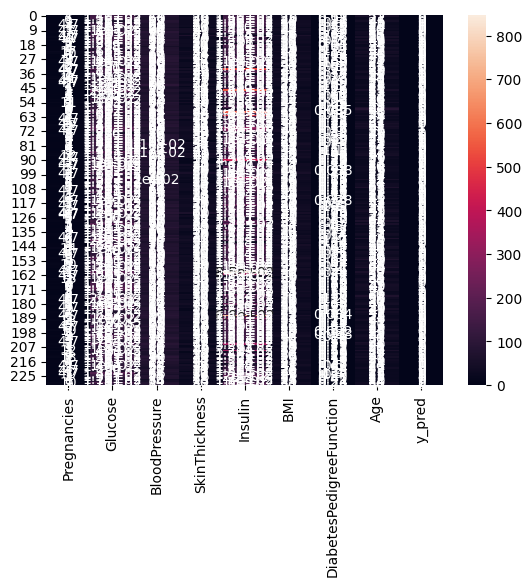

In [54]:
sns.heatmap(ndf, annot=True)

In [55]:
cm=metrics.confusion_matrix(Y_test, y_predict, labels=[1,0])

In [56]:
df_cm=pd.DataFrame(cm, index=[i for i in ['1','0']],
                   columns=[i for i in ["Predict 1","Predict 0"]])

<Axes: >

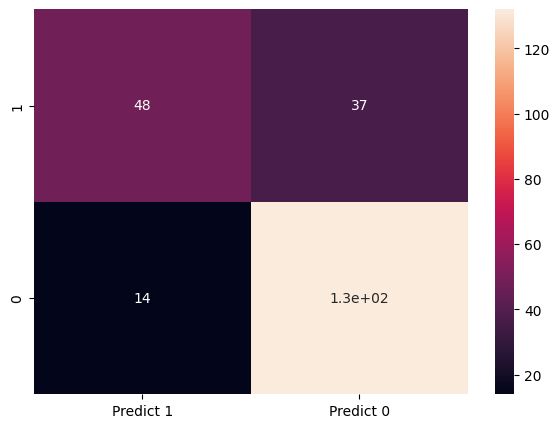

In [57]:
plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot=True)